In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#importing the data and understanding it
data = pd.read_csv("/content/climate_change.csv")

data.head(10)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,10,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,1983,11,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,1983,12,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,1984,2,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


In [ ]:
data.shape

(308, 11)

In [ ]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


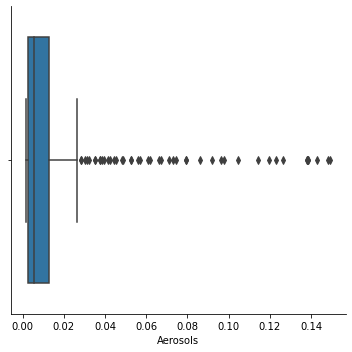

In [ ]:
sns.catplot(x = "Aerosols", data = data, kind = 'box')

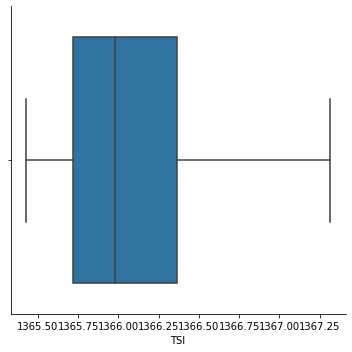

In [ ]:
sns.catplot(x = "TSI", data = data, kind = 'box')

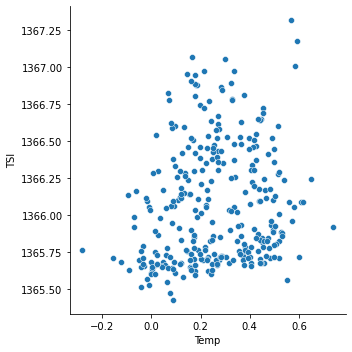

In [ ]:
sns.relplot(y = "TSI", x = "Temp", data = data)

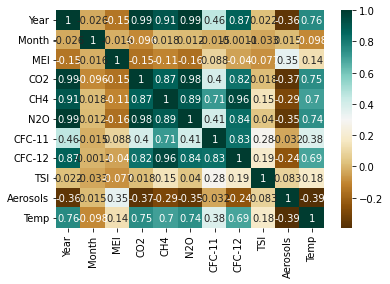

In [ ]:
c = data.corr()
sns.heatmap(c, cmap = 'BrBG', annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


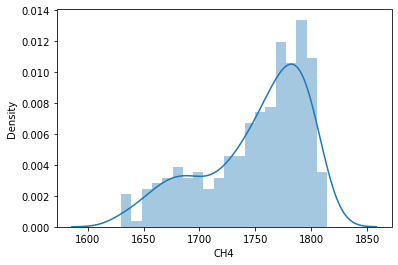

In [ ]:
sns.distplot(data['CH4'],bins = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


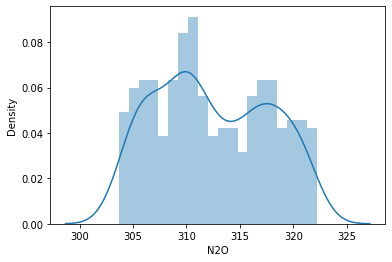

In [ ]:
sns.distplot(data['N2O'],bins = 20)


In [ ]:

#finding inter quartile range (IQR) to remove outliers (can also be done using Z score)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQR)

Year        13.00000
Month        6.00000
MEI          1.22925
CO2         20.43500
CH4         64.70250
N2O          8.86750
CFC-11      20.73550
CFC-12      68.11350
TSI          0.64620
Aerosols     0.00980
Temp         0.28550
dtype: float64


In [ ]:
n = len(data)
print(n)

243


In [ ]:
df1 = data[ data.iloc[:,0]<=2006]  
import math
# df1 = data[0:math.floor(0.67*n)]  
df1.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
29,1985,10,-0.140,343.08,1681.56,305.395,215.327,390.676,1365.5269,0.0101,-0.008
30,1985,11,-0.050,344.40,1680.68,305.530,216.282,392.714,1365.6289,0.0097,-0.093
31,1985,12,-0.293,345.82,1677.99,305.653,217.326,394.539,1365.6794,0.0122,-0.002
32,1986,1,-0.307,346.54,1675.82,305.775,218.382,396.082,1365.6746,0.0146,0.121
33,1986,2,-0.191,347.13,1666.83,305.911,219.379,397.345,1365.5475,0.0158,0.065


In [ ]:
df1.shape

(219, 11)

In [ ]:
# df1 = data[0:math.floor(0.33*n)]  
df2 = data[ data.iloc[:,0]>2006]
df2.shape

(24, 11)

In [ ]:
x = np.array(df1["Year"])
y = np.array(df1["Temp"])
n = np.size(x)
 
# mean of x and y vector
m_x = np.nanmean(x)
m_y = np.nanmean(y)

# calculating cross-deviation and deviation about x
SS_xy = np.nansum(y*x) - n*m_y*m_x
SS_xx = np.nansum(x*x) - n*m_x*m_x
 
# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
print("b1 = " + str(b_1) + " b0 = " + str(b_0))

b1 = 0.019320119913043932 b0 = -38.27689692229592


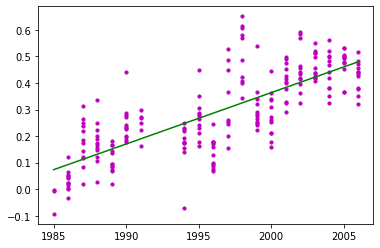

In [ ]:
plt.scatter(x, y, color = "m",marker = "o", s = 10)
y_pred = b_0 + b_1*x
plt.plot(x, y_pred, color = "g")

In [ ]:
r = r2_score(y, y_pred)
print("The R-squared value is: ")
print(r)

The R-squared value is: 
0.5998241256298624


In [ ]:
x = np.array(df1["MEI"])
y = np.array(df1["Temp"])
n = np.size(x)
 
# mean of x and y vector
m_x = np.nanmean(x)
m_y = np.nanmean(y)

# calculating cross-deviation and deviation about x
SS_xy = np.nansum(y*x) - n*m_y*m_x
SS_xx = np.nansum(x*x) - n*m_x*m_x
 
# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
print("b1 = " + str(b_1) + " b0 = " + str(b_0))

b1 = 0.03767944623406098 b0 = 0.28486183782595254


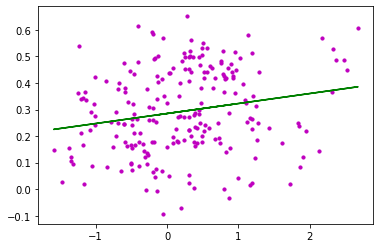

In [ ]:
plt.scatter(x, y, color = "m",marker = "o", s = 10)
y_pred = b_0 + b_1*x
plt.plot(x, y_pred, color = "g")

In [ ]:
r = r2_score(y, y_pred)
print("The R-squared value is: ")
print(r)

The R-squared value is: 
0.03991166620773612


In [ ]:
x = np.array(df1["CO2"])
y = np.array(df1["Temp"])
n = np.size(x)
 
# mean of x and y vector
m_x = np.nanmean(x)
m_y = np.nanmean(y)

# calculating cross-deviation and deviation about x
SS_xy = np.nansum(y*x) - n*m_y*m_x
SS_xx = np.nansum(x*x) - n*m_x*m_x
 
# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
print("b1 = " + str(b_1) + " b0 = " + str(b_0))

b1 = 0.011412431626899214 b0 = -3.8647697327329276


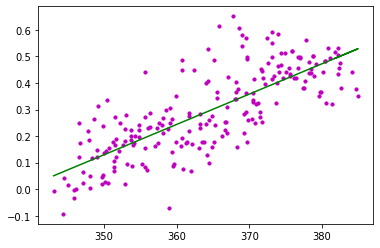

In [ ]:
plt.scatter(x, y, color = "m",marker = "o", s = 10)
y_pred = b_0 + b_1*x
plt.plot(x, y_pred, color = "g")

In [ ]:
r = r2_score(y, y_pred)
print("The R-squared value is: ")
print(r)

The R-squared value is: 
0.5952953189552133


In [ ]:
x = np.array(df1["CH4"])
y = np.array(df1["Temp"])
n = np.size(x)
 
# mean of x and y vector
m_x = np.nanmean(x)
m_y = np.nanmean(y)

# calculating cross-deviation and deviation about x
SS_xy = np.nansum(y*x) - n*m_y*m_x
SS_xx = np.nansum(x*x) - n*m_x*m_x
 
# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
print("b1 = " + str(b_1) + " b0 = " + str(b_0))

b1 = 0.002965333307539993 b0 = -4.918226367580401


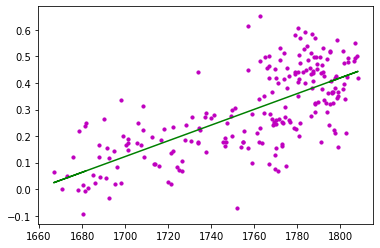

In [ ]:
plt.scatter(x, y, color = "m",marker = "o", s = 10)
y_pred = b_0 + b_1*x
plt.plot(x, y_pred, color = "g")

In [ ]:
r = r2_score(y, y_pred)
print("The R-squared value is: ")
print(r)

The R-squared value is: 
0.4885937583065536


#Multiple Linear Regression


##Train


In [ ]:
x = data[['MEI','CO2','CH4','N2O','CFC-11','CFC-12','TSI','Aerosols']]
y = data['Temp']
data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
29,1985,10,-0.140,343.08,1681.56,305.395,215.327,390.676,1365.5269,0.0101,-0.008
30,1985,11,-0.050,344.40,1680.68,305.530,216.282,392.714,1365.6289,0.0097,-0.093
31,1985,12,-0.293,345.82,1677.99,305.653,217.326,394.539,1365.6794,0.0122,-0.002
32,1986,1,-0.307,346.54,1675.82,305.775,218.382,396.082,1365.6746,0.0146,0.121
33,1986,2,-0.191,347.13,1666.83,305.911,219.379,397.345,1365.5475,0.0158,0.065
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
df1 = data[ data.iloc[:,0]<=2006] 
x = df1[['MEI','CO2','CH4','N2O','CFC-11','CFC-12','TSI','Aerosols']]
y = df1['Temp']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
df1.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
29,1985,10,-0.140,343.08,1681.56,305.395,215.327,390.676,1365.5269,0.0101,-0.008
30,1985,11,-0.050,344.40,1680.68,305.530,216.282,392.714,1365.6289,0.0097,-0.093
31,1985,12,-0.293,345.82,1677.99,305.653,217.326,394.539,1365.6794,0.0122,-0.002
32,1986,1,-0.307,346.54,1675.82,305.775,218.382,396.082,1365.6746,0.0146,0.121
33,1986,2,-0.191,347.13,1666.83,305.911,219.379,397.345,1365.5475,0.0158,0.065


In [ ]:
df2 = data[ data.iloc[:,0]>2006]  
# x =df2[['MEI','CO2','CH4','N2O','CFC-11','CFC-12','TSI','Aerosols']]
# y = df2['Temp']

df2.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
284,2007,1,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,2007,2,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498
286,2007,3,0.074,384.56,1803.10,320.548,247.997,538.811,1365.7544,0.0045,0.435
287,2007,4,-0.049,386.40,1802.11,320.518,247.574,538.586,1365.7228,0.0045,0.466
288,2007,5,0.183,386.58,1795.65,320.445,247.224,538.130,1365.6932,0.0041,0.372


In [ ]:
df1.shape

(219, 11)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x, y)

LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -51.031969159858036
Coefficients:


[('MEI', 0.06223569777302381),
 ('CO2', 0.0049606987940408465),
 ('CH4', -0.00038810727802363575),
 ('N2O', 0.0018262419311547184),
 ('CFC-11', -0.0011344993284555694),
 ('CFC-12', 0.0014013277032073551),
 ('TSI', 0.03604734063953119),
 ('Aerosols', -8.435947559286046)]

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     68.15
Date:                Sun, 22 May 2022   Prob (F-statistic):           3.37e-54
Time:                        18:24:58   Log-Likelihood:                 229.49
No. Observations:                 219   AIC:                            -441.0
Df Residuals:                     210   BIC:                            -410.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.0320     24.469     -2.086      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x_test = df2[['MEI','CFC-12','TSI','Aerosols']]
y_test = df2['Temp']
# x_train = df1[['MEI','CFC-12','TSI','Aerosols']]
# y_train = df1['Temp']

In [ ]:
mlr_pred = LinearRegression()  
mlr_pred.fit(x_test, y_test)
y_pred_mlr= mlr_pred.predict(x_test)
# y_pred_mlr.summary

In [ ]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.56487964 0.50982722 0.41833238 0.4219374  0.4233936  0.34750379
 0.35712998 0.35038138 0.31947771 0.30459831 0.33791073 0.31441562
 0.3025587  0.25062379 0.24506255 0.27323876 0.30233673 0.35701416
 0.36205117 0.36896603 0.38660211 0.39278788 0.40638529 0.39458505]


In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
284,0.601,0.564880
285,0.498,0.509827
286,0.435,0.418332
287,0.466,0.421937
288,0.372,0.423394


In [ ]:
mlr = LinearRegression()  
mlr.fit(x, y)

LinearRegression()

In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 72.19
Mean Absolute Error: 0.0543044181922556
Mean Square Error: 0.005831687806321661
Root Mean Square Error: 0.07636548831980099


In [ ]:
import numpy as np


In [ ]:
r = np.corrcoef(df1['N2O'], df1['MEI'])
print(r[1][0])

-0.06177124908370091


In [ ]:
r = np.corrcoef(df1['N2O'], df1['CO2'])
print(r[1][0])

0.9749926361365618


In [ ]:
r = np.corrcoef(df1['N2O'], df1['CH4'])
print(r[1][0])

0.8903124993701752


In [ ]:
r = np.corrcoef(df1['N2O'], df1['CFC-11'])
print(r[1][0])

0.3273891567210462


In [ ]:
r = np.corrcoef(df1['N2O'], df1['CFC-12'])
print(r[1][0])

0.8645200386566597


In [ ]:
r = np.corrcoef(df1['N2O'], df1['TSI'])
print(r[1][0])

0.15958759016062263


In [ ]:
r = np.corrcoef(df1['N2O'], df1['Aerosols'])
print(r[1][0])

-0.6609381809526801


In [ ]:
r = np.corrcoef(df1['CFC-11'], df1['N2O'])
print(r[1][0])

0.3273891567210462


In [ ]:
r = np.corrcoef(df1['CFC-11'], df1['CO2'])
print(r[1][0])

0.34154482148525867


In [ ]:
r = np.corrcoef(df1['CFC-11'], df1['MEI'])
print(r[1][0])

-0.16610201966431865


In [ ]:
r = np.corrcoef(df1['CFC-11'], df1['CH4'])
print(r[1][0])

0.627913787898016


In [ ]:
r = np.corrcoef(df1['CFC-11'], df1['CFC-12'])
print(r[1][0])

0.7493680735584559


In [ ]:
r = np.corrcoef(df1['CFC-11'], df1['TSI'])
print(r[1][0])

0.2571940874708528


In [ ]:
r = np.corrcoef(df1['CFC-11'], df1['Aerosols'])
print(r[1][0])

-0.23054354377641395


In [ ]:
x = df1[['MEI','N2O','TSI','Aerosols']]
y = df1['Temp']
df1

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
29,1985,10,-0.140,343.08,1681.56,305.395,215.327,390.676,1365.5269,0.0101,-0.008
30,1985,11,-0.050,344.40,1680.68,305.530,216.282,392.714,1365.6289,0.0097,-0.093
31,1985,12,-0.293,345.82,1677.99,305.653,217.326,394.539,1365.6794,0.0122,-0.002
32,1986,1,-0.307,346.54,1675.82,305.775,218.382,396.082,1365.6746,0.0146,0.121
33,1986,2,-0.191,347.13,1666.83,305.911,219.379,397.345,1365.5475,0.0158,0.065
...,...,...,...,...,...,...,...,...,...,...,...
279,2006,8,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041,0.482
280,2006,9,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043,0.425
281,2006,10,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044,0.472
282,2006,11,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,0.440


In [ ]:
x

,MEI,N2O,TSI,Aerosols
29,-0.140,305.395,1365.5269,0.0101
30,-0.050,305.530,1365.6289,0.0097
31,-0.293,305.653,1365.6794,0.0122
32,-0.307,305.775,1365.6746,0.0146
33,-0.191,305.911,1365.5475,0.0158
...,...,...,...,...
279,0.759,319.930,1365.7067,0.0041
280,0.793,320.010,1365.8419,0.0043
281,0.892,320.125,1365.8270,0.0044
282,1.292,320.321,1365.7039,0.0049


In [ ]:
y

29    -0.008
30    -0.093
31    -0.002
32     0.121
33     0.065
       ...  
279    0.482
280    0.425
281    0.472
282    0.440
283    0.518
Name: Temp, Length: 219, dtype: float64

In [ ]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sun, 22 May 2022   Prob (F-statistic):           8.92e-56
Time:                        18:24:58   Log-Likelihood:                 223.51
No. Observations:                 219   AIC:                            -437.0
Df Residuals:                     214   BIC:                            -420.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.1366     23.146     -2.296      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
